In [1]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd
import numpy as np

Accuracy: 0.98
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       104
           2       1.00      0.93      0.96        95
           3       0.93      1.00      0.96        88
           4       1.00      0.99      1.00       113

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



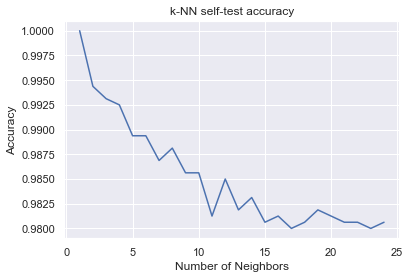

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00422/wifi_localization.txt'
df = pd.read_csv(url, header=None, delimiter='\t')

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k = 10
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy[i] = knn.score(X_train, y_train)

plt.title('k-NN self-test accuracy')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

# I chose a test split value of 0.2 to use very little of the 
# original dataset in the training to see how well it trains the model.
# I also used 42 random state to shuffle the data 42% or almost half of the data, to
# see how well the model performs. Also I chose nearest neighbors as 10 because as you
# can see in the graph, around 10 neighbors is were the graph starts to even out.


In [3]:
DT = DecisionTreeClassifier(max_depth = 5, random_state = 0)
DT.fit(X, y)
score = DT.score(X_test, y_test)
print(score)
y_pred = DT.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

# Higher max depth increases the precision of the model, so I went with 5.

0.98
              precision    recall  f1-score   support

           1       0.98      1.00      0.99       104
           2       0.99      0.95      0.97        95
           3       0.95      0.98      0.96        88
           4       1.00      0.99      1.00       113

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



Accuracy: 0.985
              precision    recall  f1-score   support

           1       0.99      0.99      0.99       157
           2       1.00      0.95      0.98       145
           3       0.95      1.00      0.97       138
           4       1.00      0.99      1.00       160

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.99      0.98      0.99       600



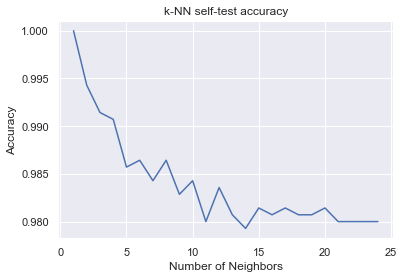

[[156   0   1   0]
 [  0 138   7   0]
 [  0   0 138   0]
 [  1   0   0 159]]


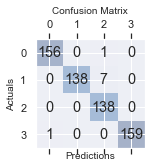

Text(0.5, 1.0, 'Accuracy with correlation to test size')

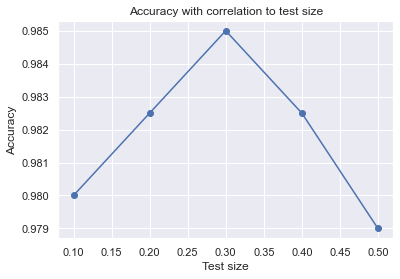

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X_train, y_train)

accuracy = clf.score(X_test, y_test)
print(f'Accuracy: {accuracy}')

y_pred = clf.predict(X_test)
report = classification_report(y_test, y_pred)

print(report)

neighbors = np.arange(1, 25)
accuracy = np.empty(len(neighbors))
 
for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy[i] = knn.score(X_train, y_train)

plt.title('k-NN self-test accuracy')
plt.plot(neighbors, accuracy)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

cm = confusion_matrix(y_test,y_pred)
print(cm)
fig, ax = plt.subplots(figsize=(2, 2))
ax.matshow(cm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(x=j, y=i,s=cm[i, j], va='center', ha='center', size='large')
plt.xlabel('Predictions', fontsize=10)
plt.ylabel('Actuals', fontsize=10)
plt.title('Confusion Matrix', fontsize=10)
plt.show()

test_sizes = [0.1, 0.2, 0.3, 0.4, 0.5]

# Train the kNN model for each test size and evaluate performance
accuracies = []
for test_size in test_sizes:

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    k = 5
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    accuracies.append(accuracy)


plt.plot(test_sizes, accuracies, marker='o')
plt.xlabel('Test size')
plt.ylabel('Accuracy')
plt.title("Accuracy with correlation to test size")
# I changed the test_size parameter to use only 30% of the dataset in testing data,
# then only 5 neighbors because from the graph around X = 5 the graph starts to differ.

In [5]:
DT = DecisionTreeClassifier(max_depth = 10, random_state = 0)
DT.fit(X, y)
score = DT.score(X_test, y_test)
print(score)
y_pred = DT.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

# changing max_depth to 10 almost gives you a perfect accuracy showing that more
# depth gives more accuracy

0.994
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       259
           2       1.00      0.98      0.99       248
           3       0.98      1.00      0.99       240
           4       1.00      1.00      1.00       253

    accuracy                           0.99      1000
   macro avg       0.99      0.99      0.99      1000
weighted avg       0.99      0.99      0.99      1000

